In [10]:
import os
import torch
from PIL import Image
from transformers import pipeline
import re

def subSelectImages(image_dir="images", num_images=5):
    detector = pipeline("zero-shot-object-detection", model="google/owlvit-base-patch32", device=0 if torch.cuda.is_available() else -1)

    labels = ["bird", "bird feeder"]
    valid_pattern = re.compile(r"^origIm\d+\.(jpeg|jpg)$")

    all_images = sorted([img for img in os.listdir(image_dir) if valid_pattern.match(img)])

    selected_images = []
    
    for image_file in all_images:
        image_path = os.path.join(image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        results = detector(image, candidate_labels=labels)

        detected_labels = {result["label"] for result in results}
        if "bird" in detected_labels and "bird feeder" in detected_labels:
            selected_images.append(image_path)

        if len(selected_images) >= num_images:
            break

    print(f" Selected Images: {selected_images}")
    return selected_images

# Example usage
if __name__ == "__main__":
    subSelectImages()


Device set to use cuda:0


 Selected Images: ['images/origIm14.jpeg', 'images/origIm2.jpeg', 'images/origIm3.jpeg', 'images/origIm5.jpeg', 'images/origIm6.jpeg']


Device set to use cuda:0


 Selected Images: ['images/origIm14.jpeg', 'images/origIm2.jpeg', 'images/origIm3.jpeg', 'images/origIm5.jpeg', 'images/origIm6.jpeg']


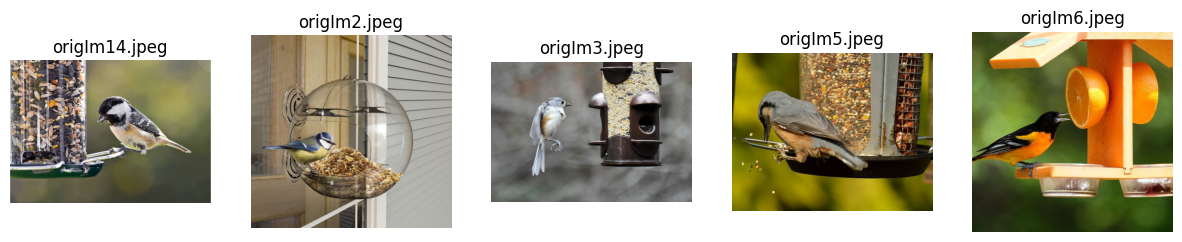

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

selected_images = subSelectImages()
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  

for ax, img_path in zip(axes, selected_images):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(os.path.basename(img_path))
    ax.axis("off")

plt.show()